[Data set Kaggle Link + Description](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

| Column | Description | 
| :- | -: | 
| work_year | The year the salary was paid. | 
| experience_level | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director. | 
| employment_type | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance | 
| salary |The total gross salary amount paid.| 
| job_title |The role worked in during the year.| 
| salary_currency | The currency of the salary paid as an ISO 4217 currency code. | 
| salaryinusd | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). | 
| employee_residence | Employee's primary country of residence in during the work year as an [ISO 3166 country code](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes).| 
| remote_ratio | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) | 
| company_location | The country of the employer's main office or contracting branch as an ISO 3166 country code. | 
| company_size | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large) | 


In [87]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
#import data
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [8]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

- We want to keep one column for salary, So in order to avoid confusions we will keep 'salary_in_usd' and drop 'salary' and 'salary_currency'

In [9]:
df = df.drop(['salary', 'salary_currency'], axis =1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [11]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [12]:
df['experience_level'].value_counts(ascending=True)

EX     26
EN     88
MI    213
SE    280
Name: experience_level, dtype: int64

In [13]:
df['remote_ratio'].value_counts(ascending=True)

50      99
0      127
100    381
Name: remote_ratio, dtype: int64

In [14]:
df['employment_type'].value_counts(ascending=True)

FL      4
CT      5
PT     10
FT    588
Name: employment_type, dtype: int64

In [15]:
df['company_size'].value_counts(ascending=True)

S     83
L    198
M    326
Name: company_size, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [17]:
df.corr()

/var/folders/7t/zrqg31m90fs3vc3p2t94dzy80000gp/T/ipykernel_28315/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


In [18]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


Graph for work_year:  total = 3


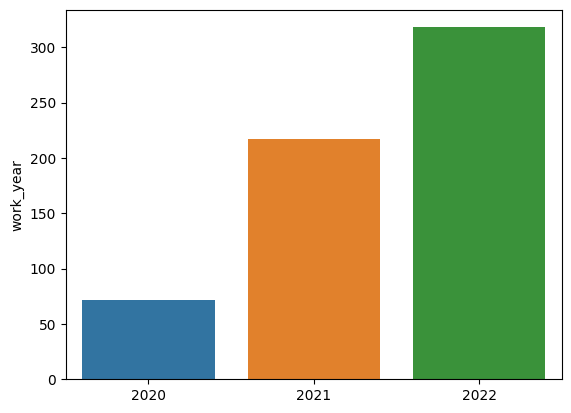

Graph for experience_level:  total = 4


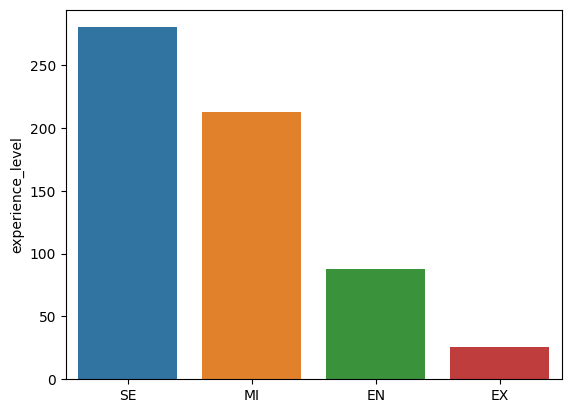

Graph for employment_type:  total = 4


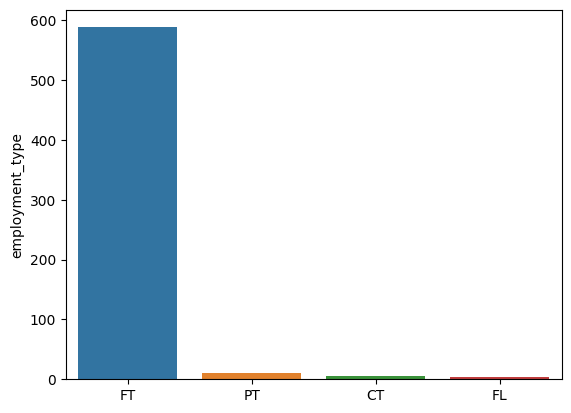

Graph for job_title:  total = 50


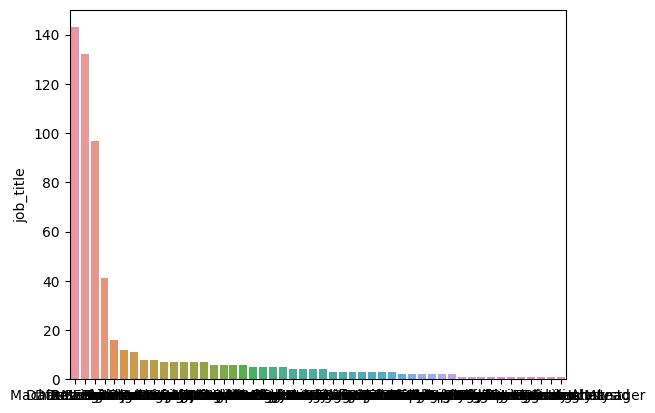

Graph for salary_in_usd:  total = 369


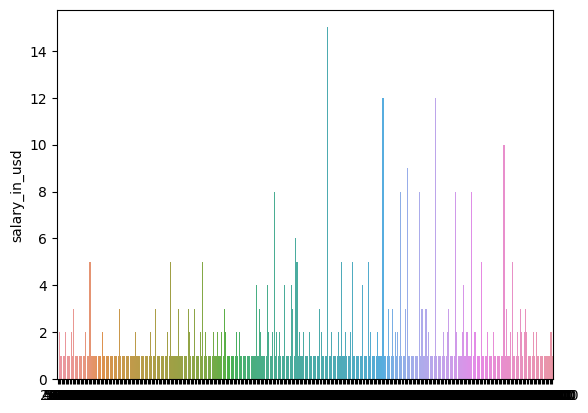

Graph for employee_residence:  total = 57


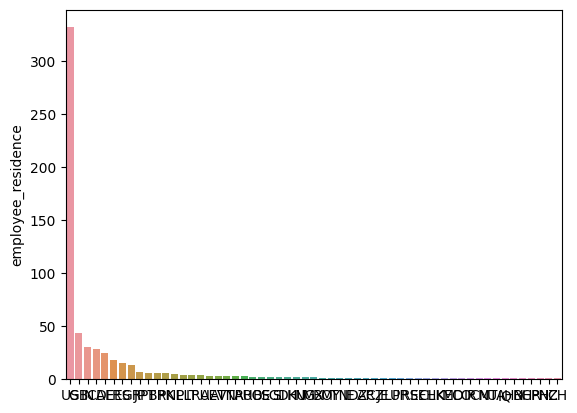

Graph for remote_ratio:  total = 3


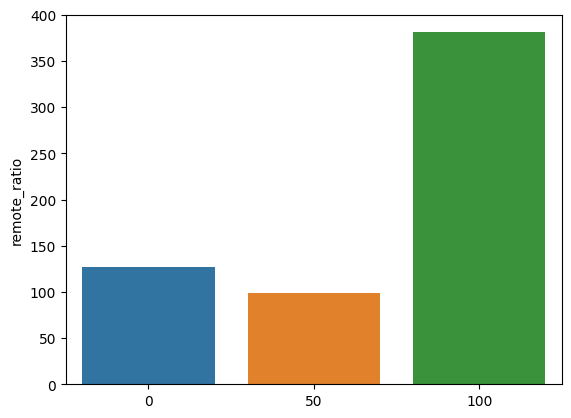

Graph for company_location:  total = 50


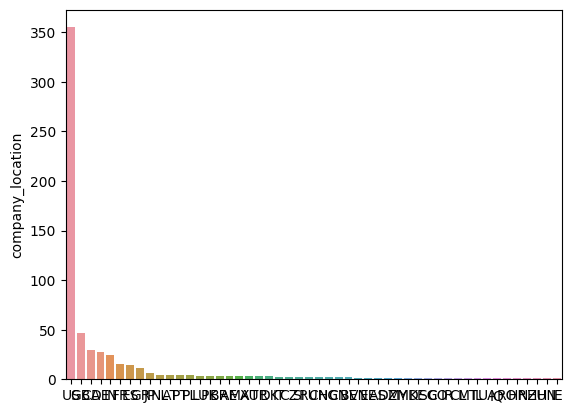

Graph for company_size:  total = 3


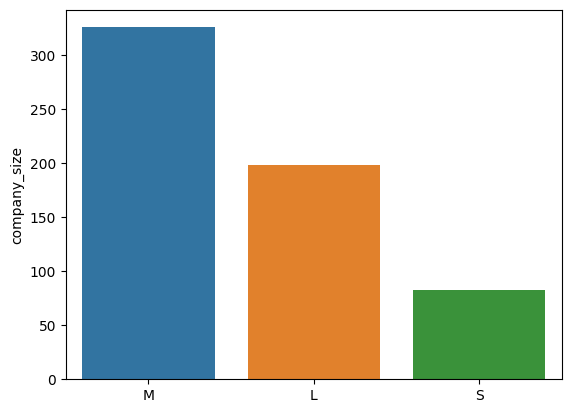

In [19]:
for i in df.columns:
    num = df[i].value_counts()
    print('Graph for %s:  total = %d' %(i, len(num))) 
    sns.barplot(x= num.index, y = num)
    plt.show()

Graph for job_title:  total = 16


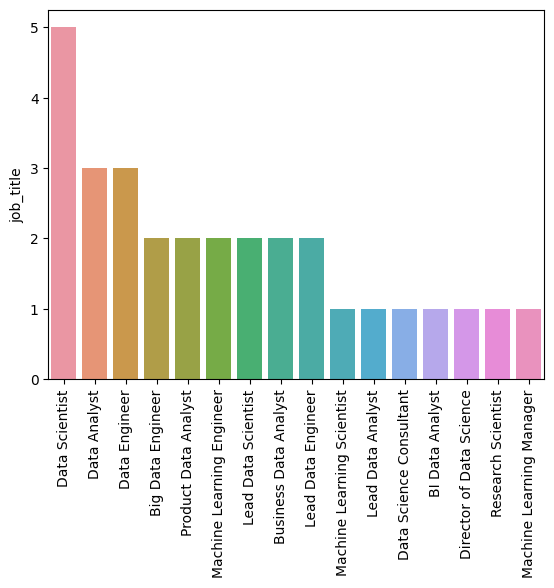

Graph for salary_in_usd:  total = 30


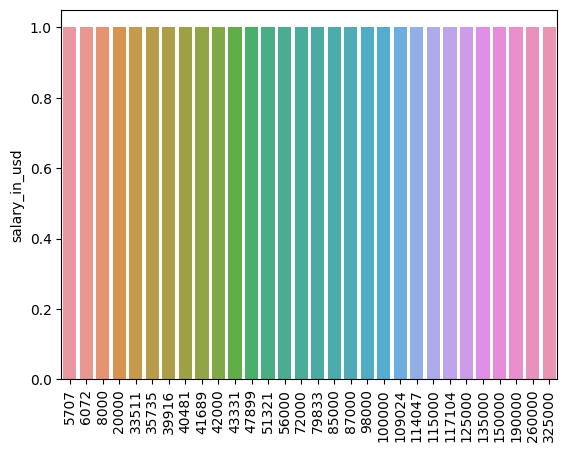

Graph for employee_residence:  total = 18


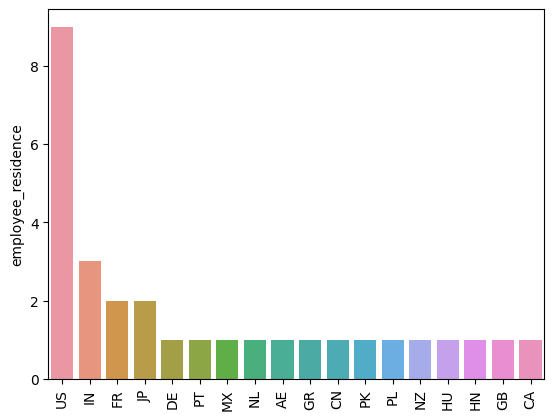

Graph for company_location:  total = 16


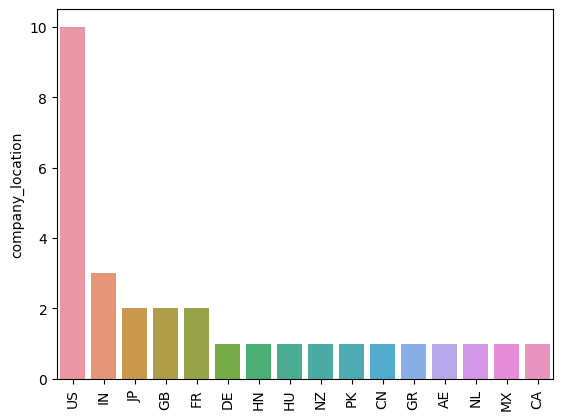

In [20]:
for i in df[['job_title','salary_in_usd','employee_residence','company_location']].columns:
    num = df[i][:30].value_counts()
    print('Graph for %s:  total = %d' %(i, len(num))) 
    chart = sns.barplot(x= num.index, y = num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation =90)
    plt.show()

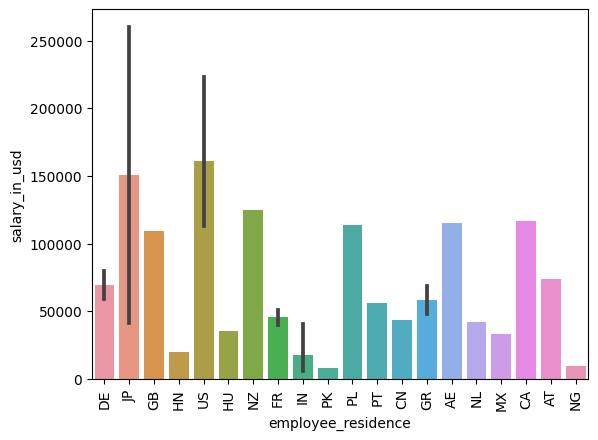

In [22]:
chart = sns.barplot(x= df['employee_residence'][:40], y = df['salary_in_usd'][:40])
chart.set_xticklabels(chart.get_xticklabels(),rotation =90)
plt.show()

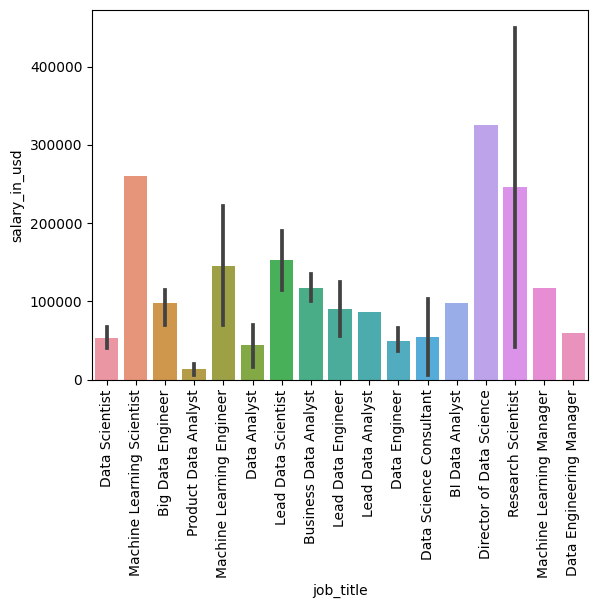

In [23]:
chart = sns.barplot(x= df['job_title'][:40], y = df['salary_in_usd'][:40])
chart.set_xticklabels(chart.get_xticklabels(),rotation =90)
plt.show()

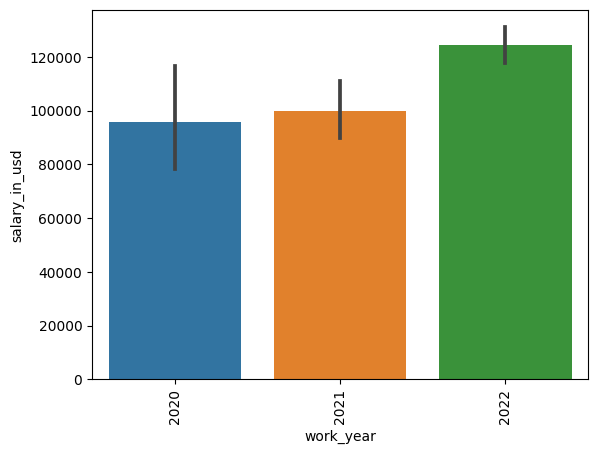

In [31]:
chart = sns.barplot(x= df['work_year'], y = df['salary_in_usd'])
chart.set_xticklabels(chart.get_xticklabels(),rotation =90)
plt.show()

- The graph shows that over the years, the salary increases

In [53]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [56]:
pd.pivot_table(df, index = ['employee_residence', 'job_title'] , values = 'salary_in_usd').sort_values('salary_in_usd', ascending = False)[:20]

salary_in_usd
employee_residence job_title                                              
US                 Applied Machine Learning Scientist        423000.000000
                   Data Analytics Lead                       405000.000000
                   Principal Data Engineer                   328333.333333
                   Director of Data Science                  287500.000000
                   Lead Data Engineer                        276000.000000
                   Financial Data Analyst                    275000.000000
                   ML Engineer                               263000.000000
JP                 Machine Learning Scientist                260000.000000
US                 Principal Data Scientist                  255500.000000
                   Research Scientist                        238000.000000
                   Applied Data Scientist                    238000.000000
                   Head of Data                              235000.000000
RU                 Head of Data                              230000.000000
US                 Director of Data Engineering              200000.000000
MY                 Head of Data                              200000.000000
CA                 Director of Data Science                  196979.000000
US                 Machine Learning Infrastructure Engineer  195000.000000
                   Lead Data Scientist                       190000.000000
                   Data Architect                            185945.888889
                   Data Science Manager                      175118.300000

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [69]:
for i in df.columns:
    if i != 'salary_in_usd':
        print('\n',i)
        print(pd.pivot_table(df, index = i, values = 'salary_in_usd').sort_values('salary_in_usd', ascending = False))
    else:
        continue


 work_year
           salary_in_usd
work_year               
2022       124522.006289
2021        99853.792627
2020        95813.000000

 experience_level
                  salary_in_usd
experience_level               
EX                199392.038462
SE                138617.292857
MI                 87996.056338
EN                 61643.318182

 employment_type
                 salary_in_usd
employment_type               
CT               184575.000000
FT               113468.073129
FL                48000.000000
PT                33070.500000

 job_title
                                          salary_in_usd
job_title                                              
Data Analytics Lead                       405000.000000
Principal Data Engineer                   328333.333333
Financial Data Analyst                    275000.000000
Principal Data Scientist                  215242.428571
Director of Data Science                  195074.000000
Data Architect                            17

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [73]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words = " ".join(df['job_title'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

word_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color = 'white', random_state =1, stopwords = STOPWORDS, max_words = 2000, width = 800, height= 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation ='bilinear')
plt.axis('off')
plt.show()

In [79]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

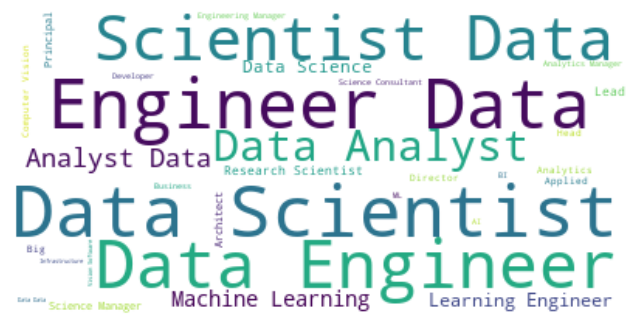

In [100]:
text = " ".join(i for i in df.job_title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords, background_color="white", random_state = 1).generate(text)
#wordcloud = WordCloud(collocations = False, stopwords=stopwords, background_color="white", random_state = 1).generate(text)
plt.figure( figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

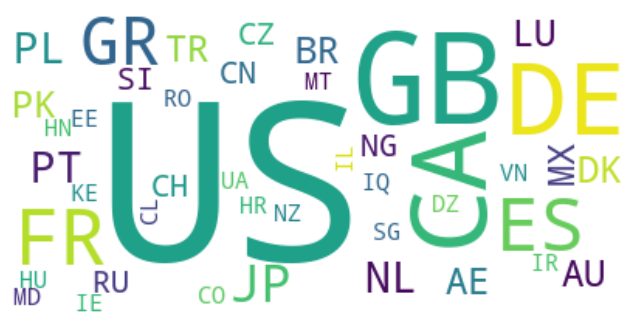

In [99]:
text = " ".join(i for i in df.company_location)
stopwords = set(STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- US: The United States of America
- GB: The United Kingdom of Great Britain and Northern Ireland
- CA: Canada
- DE: Germany
- FR:
- ES: 
- GR: 

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


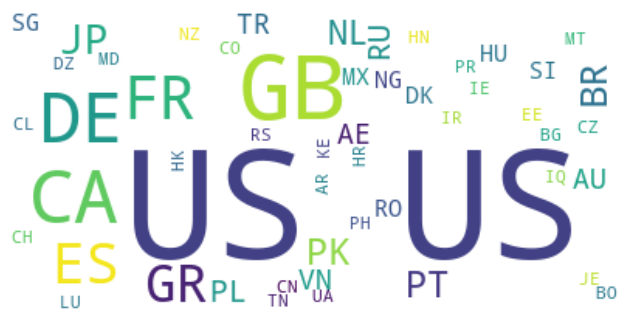

In [102]:
text = " ".join(i for i in df.employee_residence)
stopwords = set(STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()